In [27]:
# dependencies  
from sqlalchemy import create_engine
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
from config import pw
import matplotlib.pyplot as plt

#create connection
engine = create_engine('postgresql://postgres:' + pw + '@localhost/sql_homework_db')
connection = engine.connect()

In [21]:
salary_data = pd.read_sql("SELECT * FROM salaries", connection)
salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


Text(0.5, 1.0, 'Common Salary Ranges')

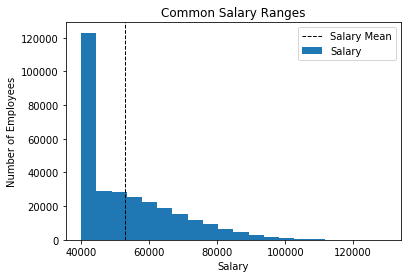

In [22]:
plt.hist(salary_data['salary'], 20, density=False, label="Salary")
plt.axvline(salary_data['salary'].mean(), color='k', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")

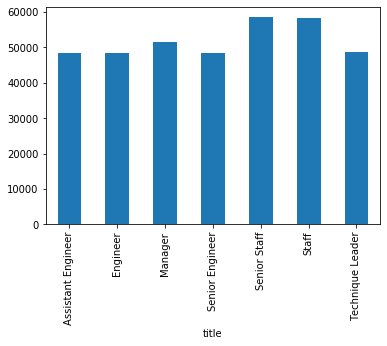

In [42]:
second_query = pd.read_sql_query('select s.salary, t.title from salaries as s join employees as e on (s.emp_no = e.emp_no) join titles as t on (e.emp_title = t.title_id)', connection)
Query_groupby_df = Second_Query.groupby(by='title').mean()
Query_groupby_df
Query_groupby_df.plot(kind='bar', legend=False)




In [46]:
id_query = pd.read_sql_query('select * From employees where emp_no = 499942',connection)
id_query

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
